# Models (FG: Extracted Features)

## Importing Libraries

In [1]:
#import this before other imports
from sklearnex import patch_sklearn,unpatch_sklearn

patch_sklearn()
#unpatch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse
from tld import get_tld
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score,log_loss,precision_score,recall_score,make_scorer,accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

## Binary Classification with all four classes

## Importing Datasets and Training models

In [2]:
urls = pd.read_csv("extracted_features.csv")
urls = urls.drop(['Unnamed: 0'],axis=1)
urls

,result,lengthOfURL,lengthOfHostname,lengthOfPath,lengthOfTLD,Tally(dir),Tally(digits),Tally(letters),IP,Tally(.),Tally(-),Tally(@),Tally(%),Tally(=),Tally(/),Tally(?),Tally(+),Tally(//)
0,0,83,8,68,2,4,18,49,0,1,8,0,0,0,6,0,0,1
1,0,83,8,68,2,4,23,43,0,1,9,0,0,0,6,0,0,1
2,0,83,8,68,2,4,22,44,0,1,9,0,0,0,6,0,0,1
3,0,83,8,68,2,4,18,46,0,1,11,0,0,0,6,0,0,1
4,0,83,8,68,2,4,18,48,0,1,9,0,0,0,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259971,0,190,7,17,2,5,36,113,0,1,2,0,16,6,7,1,0,1
259972,0,117,13,96,3,3,0,98,0,1,12,0,0,0,5,0,0,1
259973,0,132,12,57,3,2,30,84,0,9,0,0,0,1,4,1,0,1
259974,0,96,12,76,3,4,0,82,0,1,5,0,0,0,6,0,0,1


In [3]:
x = urls.reindex(columns=['lengthOfURL','lengthOfHostname','lengthOfPath','lengthOfTLD','Tally(.)','Tally(-)','Tally(@)','Tally(%)','Tally(=)','Tally(/)','Tally(?)','Tally(+)','Tally(//)','Tally(dir)','Tally(digits)','Tally(letters)','IP'])

In [7]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score),
           'log_loss': make_scorer(log_loss)}

In [5]:
model = LogisticRegression()
scores = cross_validate(model, x, urls['result'], cv=5,scoring=scoring,return_train_score=True)
scores

{'fit_time': array([2.00265789, 1.89557815, 1.82860494, 1.771245  , 1.74807954]),
 'score_time': array([0.0678184 , 0.06011319, 0.09075499, 0.07769203, 0.05186176]),
 'test_accuracy': array([0.89928071, 0.8581979 , 0.90608712, 0.83821521, 0.83802289]),
 'train_accuracy': array([0.88223387, 0.8721037 , 0.88196037, 0.90600584, 0.89303831]),
 'test_precision': array([0.87274229, 0.8315767 , 0.89128984, 0.89437567, 0.89054306]),
 'train_precision': array([0.88495472, 0.86528967, 0.88412553, 0.90692497, 0.90061947]),
 'test_recall': array([0.93487961, 0.89833442, 0.92499135, 0.76702054, 0.77079006]),
 'train_recall': array([0.87869987, 0.88143205, 0.87914339, 0.90487547, 0.88357534]),
 'test_f1': array([0.90274296, 0.86366746, 0.90782793, 0.82581687, 0.82635052]),
 'train_f1': array([0.88181621, 0.87328627, 0.88162742, 0.90589906, 0.892016  ]),
 'test_log_loss': array([3.4787754 , 4.89774364, 3.24368094, 5.5878848 , 5.59452917]),
 'train_log_loss': array([4.06754375, 4.41743651, 4.0769904 ,

In [3]:
new_urls = pd.read_csv("extracted_features_0.csv")
new_urls

,Unnamed: 0,url,result,lengthOfURL,lengthOfHostname,lengthOfPath,lengthOfTLD,Tally(dir),Tally(digits),Tally(letters),IP,Tally(.),Tally(-),Tally(@),Tally(%),Tally(=),Tally(/),Tally(?),Tally(+),Tally(//)
0,0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8,68,2,4,18,49,0,1,8,0,0,0,6,0,0,1
1,1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8,68,2,4,23,43,0,1,9,0,0,0,6,0,0,1
2,2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8,68,2,4,22,44,0,1,9,0,0,0,6,0,0,1
3,3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8,68,2,4,18,46,0,1,11,0,0,0,6,0,0,1
4,4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8,68,2,4,18,48,0,1,9,0,0,0,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165361,165361,http://archive.salisburyjournal.co.uk/2001/3/7/,1,47,30,10,5,4,6,31,0,3,0,0,0,0,6,0,0,1
165362,165362,http://astore.amazon.co.uk/allezvinsfrenchr/de...,1,81,19,55,5,4,23,46,0,3,2,0,0,0,6,0,0,1
165363,165363,http://archive.thisischeshire.co.uk/2000/1/14/...,1,57,28,22,5,4,13,33,0,4,0,0,0,0,6,0,0,1
165364,165364,http://applerugs.co.uk/rugs/product_info.php?p...,1,116,15,22,5,2,25,73,0,3,0,0,0,4,4,3,0,1


## Count/tf-idf with binary

In [17]:
vectorizer = CountVectorizer(analyzer='char')
train_vec = vectorizer.fit_transform(new_urls['url'])
train_vec.shape

(165366, 133)

In [25]:
#LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,SVC
model1 = RandomForestClassifier(max_depth = 13,n_jobs = -1)
new_scores = cross_validate(model1, train_vec, new_urls['result'], cv=5,scoring=scoring,return_train_score=True)
new_scores

{'fit_time': array([17.30991721, 12.01027203, 13.50404   , 11.90267396, 12.59153128]),
 'score_time': array([0.12569451, 0.13908577, 0.13028693, 0.13251638, 0.19659376]),
 'test_accuracy': array([0.94031566, 0.95924168, 0.97674841, 0.91503643, 0.92217216]),
 'train_accuracy': array([0.99111813, 0.99074025, 0.98996923, 0.99014309, 0.99235031]),
 'test_precision': array([0.93502825, 0.97153461, 0.99234973, 0.98998394, 0.97420844]),
 'train_precision': array([0.99316008, 0.99305276, 0.99295125, 0.99231935, 0.99605002]),
 'test_recall': array([0.99307639, 0.97676655, 0.977959  , 0.90103085, 0.92549427]),
 'train_recall': array([0.99555727, 0.99518228, 0.99429758, 0.995163  , 0.99421098]),
 'test_f1': array([0.96317851, 0.97414355, 0.98510181, 0.94341522, 0.94922676]),
 'train_f1': array([0.99435723, 0.99411638, 0.99362396, 0.99373914, 0.99512965]),
 'test_log_loss': array([2.06146759, 1.40776057, 0.80308638, 2.93454332, 2.6880936 ]),
 'train_log_loss': array([0.30677314, 0.31982478, 0.3464

In [26]:
print("BEFORE SMOTE \n\n")
print("The Fit Time is: ",new_scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",new_scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",new_scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",new_scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",new_scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",new_scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",new_scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",new_scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",new_scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",new_scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",new_scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",new_scores['test_log_loss'].mean())
print("\n")

BEFORE SMOTE 


The Fit Time is:  13.463686895370483


The Score Time is:  0.1448354721069336


The Train Accuracy score is:  0.9908642046338546


The Train F1 score is:  0.9941932710402007


The Train Precision score is:  0.9935066917255595


The Train Recall score is:  0.9948822204445449


The Train Log Loss is:  0.3155432816038579


The Test Accuracy score is:  0.9427028675012501


The Test F1 score is:  0.9630131718279868


The Test Precision score is:  0.972620991980594


The Test Recall score is:  0.954865410612703


The Test Log Loss is:  1.9789902931195638




In [7]:
x1 = new_urls.reindex(columns=['lengthOfURL','lengthOfHostname','lengthOfPath','lengthOfTLD','Tally(.)','Tally(-)','Tally(@)','Tally(%)','Tally(=)','Tally(/)','Tally(?)','Tally(+)','Tally(//)','Tally(dir)','Tally(digits)','Tally(letters)','IP'])

In [14]:
model1 = DecisionTreeClassifier(max_depth = 3)
new_scores = cross_validate(model1, x1, new_urls['result'], cv=5,scoring=scoring,return_train_score=True)
new_scores

{'fit_time': array([0.12967324, 0.12564421, 0.12366819, 0.12565947, 0.12262511]),
 'score_time': array([0.02692795, 0.03091717, 0.02593446, 0.02987432, 0.03096461]),
 'test_accuracy': array([0.85517325, 0.94106975, 0.94808454, 0.86635624, 0.8960179 ]),
 'train_accuracy': array([0.93743386, 0.93695812, 0.93520443, 0.95669461, 0.94184122]),
 'test_precision': array([0.85287854, 0.97525692, 0.97410763, 0.95654198, 0.91995234]),
 'train_precision': array([0.96393706, 0.96997868, 0.97025282, 0.97185966, 0.95825561]),
 'test_recall': array([0.9858066 , 0.94910951, 0.95945686, 0.86948996, 0.95041926]),
 'train_recall': array([0.95617848, 0.94917829, 0.94659153, 0.97308395, 0.96818925]),
 'test_f1': array([0.91453754, 0.96200558, 0.96672674, 0.91094096, 0.93493766]),
 'train_f1': array([0.9600421 , 0.95946576, 0.95827614, 0.97247142, 0.96319682]),
 'test_log_loss': array([5.00224569, 2.0353937 , 1.79311248, 4.61591669, 3.59146649]),
 'train_log_loss': array([2.16098046, 2.17740801, 2.23797786,

## OUTPUT Comparision

In [15]:
print("BEFORE SMOTE \n\n")
print("The Fit Time is: ",new_scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",new_scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",new_scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",new_scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",new_scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",new_scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",new_scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",new_scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",new_scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",new_scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",new_scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",new_scores['test_log_loss'].mean())
print("\n")

BEFORE SMOTE 


The Fit Time is:  0.12545404434204102


The Score Time is:  0.028923702239990235


The Train Accuracy score is:  0.9416264464996008


The Train F1 score is:  0.9626904479034252


The Train Precision score is:  0.9668567661004737


The Train Recall score is:  0.9586443008561856


The Train Log Loss is:  2.0161717935993337


The Test Accuracy score is:  0.9013403369924236


The Test F1 score is:  0.937829696088208


The Test Precision score is:  0.9357474808990031


The Test Recall score is:  0.942856439467444


The Test Log Loss is:  3.407627010913071




In [22]:
print("AFTER SMOTE \n\n")
print("The Fit Time is: ",scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",scores['test_log_loss'].mean())
print("\n")

AFTER SMOTE 


The Fit Time is:  0.2738619804382324


The Score Time is:  0.045724010467529295


The Train Accuracy score is:  0.8872011220914844


The Train F1 score is:  0.8870132279088867


The Train Precision score is:  0.8888518396819354


The Train Recall score is:  0.8852605859878382


The Train Log Loss is:  3.8959795426898154


The Test Accuracy score is:  0.867222228202054


The Test F1 score is:  0.86426117067755


The Test Precision score is:  0.8764401891444911


The Test Recall score is:  0.8570414607213683


The Test Log Loss is:  4.586030784022599




## Performance on Real-world Data using Logistic Regression

In [2]:
test_data = pd.read_csv('testing_feature_extraction.csv')
test_data

,Unnamed: 0,url,label,result,lengthOfURL,lengthOfHostname,lengthOfPath,lengthOfTLD,Tally(dir),Tally(digits),...,IP,Tally(.),Tally(-),Tally(@),Tally(%),Tally(=),Tally(/),Tally(?),Tally(+),Tally(//)
0,0,https://www.google.com,benign,0,22,14,0,3,0,0,...,0,2,0,0,0,0,2,0,0,1
1,1,https://www.youtube.com,benign,0,23,15,0,3,0,0,...,0,2,0,0,0,0,2,0,0,1
2,2,https://www.facebook.com,benign,0,24,16,0,3,0,0,...,0,2,0,0,0,0,2,0,0,1
3,3,https://www.baidu.com,benign,0,21,13,0,3,0,0,...,0,2,0,0,0,0,2,0,0,1
4,4,https://www.wikipedia.org,benign,0,25,17,0,3,0,0,...,0,2,0,0,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450171,450171,http://ecct-it.com/docmmmnn/aptgd/index.php,malicious,1,43,11,25,3,3,0,...,0,2,1,0,0,0,5,0,0,1
450172,450172,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,159,13,139,3,12,21,...,0,2,0,0,0,1,14,0,0,1
450173,450173,http://faboleena.com/js/infortis/jquery/plugin...,malicious,1,147,13,127,3,12,20,...,0,1,0,0,0,1,14,0,0,1
450174,450174,http://atualizapj.com/,malicious,1,22,14,1,3,1,0,...,0,1,0,0,0,0,3,0,0,1


In [36]:
test_model = LogisticRegression()
test_model.fit(x, urls['result'])

LogisticRegression()

In [37]:
test_model1 = LogisticRegression()
test_model1.fit(x1, new_urls['result'])

LogisticRegression()

In [38]:
test_x = test_data.reindex(columns=['lengthOfURL','lengthOfHostname','lengthOfPath','lengthOfTLD','Tally(.)','Tally(-)','Tally(@)','Tally(%)','Tally(=)','Tally(/)','Tally(?)','Tally(+)','Tally(//)','Tally(dir)','Tally(digits)','Tally(letters)','IP'])
test_y = test_data['result']

In [39]:
predictions = test_model.predict(test_x)
predictions1 = test_model1.predict(test_x)

In [40]:
print("BEFORE SMOTE \n\n")
print("The Test Accuracy score is: ",accuracy_score(predictions,test_y))
print("\n")
print("The Test F1 score is: ",f1_score(predictions,test_y))
print("\n")
print("The Test Precision score is: ",precision_score(predictions,test_y))
print("\n")
print("The Test Recall score is: ",recall_score(predictions,test_y))
print("\n")
print("The Test Log Loss is: ",log_loss(predictions,test_y))
print("\n")

BEFORE SMOTE 


The Test Accuracy score is:  0.2642122192209269


The Test F1 score is:  0.3610110113972205


The Test Precision score is:  0.8959286849614125


The Test Recall score is:  0.22604811395053317


The Test Log Loss is:  25.413228939828674




In [41]:
print("AFTER SMOTE \n\n")
print("The Test Accuracy score is: ",accuracy_score(predictions1,test_y))
print("\n")
print("The Test F1 score is: ",f1_score(predictions1,test_y))
print("\n")
print("The Test Precision score is: ",precision_score(predictions1,test_y))
print("\n")
print("The Test Recall score is: ",recall_score(predictions1,test_y))
print("\n")
print("The Test Log Loss is: ",log_loss(predictions1,test_y))
print("\n")

AFTER SMOTE 


The Test Accuracy score is:  0.24775865439294853


The Test F1 score is:  0.37125346037946744


The Test Precision score is:  0.9572952373657098


The Test Recall score is:  0.2302796901595959


The Test Log Loss is:  25.981503552729336




## Binary Classification between two classes (Benign and Phishing)

In [81]:
l1 = pd.read_csv("FinalDataset/URL/Benign_list_big_final.csv", header=None)
l1['result'] = [0 for _ in range(l1.shape[0])]
l1

,0,result
0,http://1337x.to/torrent/1048648/American-Snipe...,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0
...,...,...
35373,https://lastpass.com/signup2.php?ac=1&from_uri...,0
35374,https://lastpass.com/signup2.php?ac=1&from_uri...,0
35375,https://lastpass.com/signup2.php?ac=1&from_uri...,0
35376,https://lastpass.com/signup2.php?ac=1&from_uri...,0


In [82]:
l2 = pd.read_csv("FinalDataset/URL/Malware_dataset.csv", header=None)
l2['result'] = [1 for _ in range(l2.shape[0])]
l2

,0,result
0,http://gzzax.livechatvalue.com/chat/chatClient...,1
1,http://gzzax.livechatvalue.com/chat/chatClient...,1
2,http://gzzax.livechatvalue.com/chat/chatClient...,1
3,http://gzzax.livechatvalue.com/chat/chatClient...,1
4,http://mtsx.com.cn/UploadFiles/2011-08/admin/%...,1
...,...,...
11561,http://www.plastischechirurgie.net/gesicht/fac...,1
11562,http://www.plastischechirurgie.net/haartranspl...,1
11563,http://www.plastischechirurgie.net/korper/gyna...,1
11564,http://dl.get1993desk.com/n/50517366/RealPlaye...,1


In [83]:
data = [l1,l2]
bin_dataset = pd.concat(data, ignore_index=True)
bin_dataset = bin_dataset.rename({0: 'url'}, axis=1)
bin_dataset

,url,result
0,http://1337x.to/torrent/1048648/American-Snipe...,0
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0
...,...,...
46939,http://www.plastischechirurgie.net/gesicht/fac...,1
46940,http://www.plastischechirurgie.net/haartranspl...,1
46941,http://www.plastischechirurgie.net/korper/gyna...,1
46942,http://dl.get1993desk.com/n/50517366/RealPlaye...,1


In [84]:
def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1
def directories(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def digit(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

def ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|' 
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)'
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url) 
    if match:
        return 1
    else:
        return 0

In [85]:
bin_dataset['lengthOfURL']=bin_dataset['url'].apply(lambda i: len(str(i)))
bin_dataset['lengthOfHostname']=bin_dataset['url'].apply(lambda i: len(urlparse(i).netloc))
bin_dataset['lengthOfPath']=bin_dataset['url'].apply(lambda i: len(urlparse(i).path))
bin_dataset['tld'] = bin_dataset['url'].apply(lambda i: get_tld(i,fail_silently=True))
bin_dataset['lengthOfTLD'] = bin_dataset['tld'].apply(lambda i: tld_length(i))
bin_dataset=bin_dataset.drop(columns=['tld'])
bin_dataset['Tally(dir)'] = bin_dataset['url'].apply(lambda i: directories(i))
bin_dataset['Tally(digits)']= bin_dataset['url'].apply(lambda i: digit(i))
bin_dataset['Tally(letters)']= bin_dataset['url'].apply(lambda i: letter(i))
bin_dataset['IP'] = bin_dataset['url'].apply(lambda i: ip_address(i))
bin_dataset['Tally(.)'] = bin_dataset['url'].apply(lambda i: i.count('.'))
bin_dataset['Tally(-)'] = bin_dataset['url'].apply(lambda i: i.count('-'))
bin_dataset['Tally(@)'] = bin_dataset['url'].apply(lambda i: i.count('@'))
bin_dataset['Tally(%)'] = bin_dataset['url'].apply(lambda i: i.count('%'))
bin_dataset['Tally(=)'] = bin_dataset['url'].apply(lambda i: i.count('='))
bin_dataset['Tally(/)'] = bin_dataset['url'].apply(lambda i: i.count('/'))
bin_dataset['Tally(?)'] = bin_dataset['url'].apply(lambda i: i.count('?'))
bin_dataset['Tally(+)'] = bin_dataset['url'].apply(lambda i: i.count('+'))
bin_dataset['Tally(//)'] = bin_dataset['url'].apply(lambda i: i.count('//'))

In [86]:
bin_dataset

,url,result,lengthOfURL,lengthOfHostname,lengthOfPath,lengthOfTLD,Tally(dir),Tally(digits),Tally(letters),IP,Tally(.),Tally(-),Tally(@),Tally(%),Tally(=),Tally(/),Tally(?),Tally(+),Tally(//)
0,http://1337x.to/torrent/1048648/American-Snipe...,0,83,8,68,2,4,18,49,0,1,8,0,0,0,6,0,0,1
1,http://1337x.to/torrent/1110018/Blackhat-2015-...,0,83,8,68,2,4,23,43,0,1,9,0,0,0,6,0,0,1
2,http://1337x.to/torrent/1122940/Blackhat-2015-...,0,83,8,68,2,4,22,44,0,1,9,0,0,0,6,0,0,1
3,http://1337x.to/torrent/1124395/Fast-and-Furio...,0,83,8,68,2,4,18,46,0,1,11,0,0,0,6,0,0,1
4,http://1337x.to/torrent/1145504/Avengers-Age-o...,0,83,8,68,2,4,18,48,0,1,9,0,0,0,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46939,http://www.plastischechirurgie.net/gesicht/fac...,1,54,27,20,3,2,0,47,0,2,0,0,0,0,4,0,0,1
46940,http://www.plastischechirurgie.net/haartranspl...,1,54,27,20,3,1,0,48,0,2,0,0,0,0,3,0,0,1
46941,http://www.plastischechirurgie.net/korper/gyna...,1,54,27,20,3,2,0,47,0,2,0,0,0,0,4,0,0,1
46942,http://dl.get1993desk.com/n/50517366/RealPlaye...,1,53,18,28,3,3,12,32,0,3,0,0,0,0,5,0,0,1


## SMOTE

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
new_X, new_Y = sm.fit_resample(bin_dataset.drop(['url','result'], axis=1), bin_dataset['result'])
bin_new_dataset = pd.concat([pd.DataFrame(new_Y), pd.DataFrame(new_X)], axis=1)

Text(0.5, 1.0, 'Classes before SMOTE')

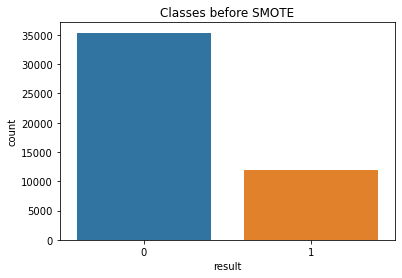

In [38]:
sns.countplot(x = 'result', data = bin_dataset, order = bin_dataset['result'].value_counts().index).set_title("Classes before SMOTE")

Text(0.5, 1.0, 'Classes after SMOTE')

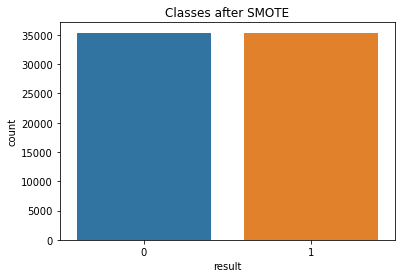

In [39]:
sns.countplot(x = 'result', data = bin_new_dataset, order = bin_new_dataset['result'].value_counts().index).set_title("Classes after SMOTE")

In [87]:
x = bin_dataset.reindex(columns=['lengthOfURL','lengthOfHostname','lengthOfPath','lengthOfTLD','Tally(.)','Tally(-)','Tally(@)','Tally(%)','Tally(=)','Tally(/)','Tally(?)','Tally(+)','Tally(//)','Tally(dir)','Tally(digits)','Tally(letters)','IP'])

In [41]:
x1 = bin_new_dataset.reindex(columns=['lengthOfURL','lengthOfHostname','lengthOfPath','lengthOfTLD','Tally(.)','Tally(-)','Tally(@)','Tally(%)','Tally(=)','Tally(/)','Tally(?)','Tally(+)','Tally(//)','Tally(dir)','Tally(digits)','Tally(letters)','IP'])

In [88]:
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score),
           'log_loss': make_scorer(log_loss)}

In [95]:
model = DecisionTreeClassifier(max_depth = 3)
scores = cross_validate(model, x, bin_dataset['result'], cv=5,scoring=scoring,return_train_score=True)
scores

{'fit_time': array([0.03592348, 0.03091526, 0.031914  , 0.03091788, 0.02992153]),
 'score_time': array([0.00997496, 0.00997663, 0.00997519, 0.00997472, 0.00897574]),
 'test_accuracy': array([0.15475557, 0.87421451, 1.        , 1.        , 0.9775245 ]),
 'train_accuracy': array([0.98229264, 0.96362668, 0.92432432, 0.92432432, 0.92994462]),
 'test_precision': array([0.11638696, 0.9938918 , 1.        , 1.        , 1.        ]),
 'train_precision': array([0.99825946, 0.99772813, 0.99922131, 0.99922118, 0.99924608]),
 'test_recall': array([0.36878513, 0.49243407, 1.        , 1.        , 0.90877648]),
 'train_recall': array([0.92975251, 0.85431752, 0.69339674, 0.6933636 , 0.71620015]),
 'test_f1': array([0.17693425, 0.65857184, 1.        , 1.        , 0.95220838]),
 'train_f1': array([0.96278888, 0.92047042, 0.81868062, 0.81865748, 0.83437205]),
 'test_log_loss': array([2.91942601e+01, 4.34447764e+00, 9.99200722e-16, 9.99200722e-16,
        7.76276291e-01]),
 'train_log_loss': array([0.61159

In [43]:
model1 = DecisionTreeClassifier()
new_scores = cross_validate(model1, x1, bin_new_dataset['result'], cv=5,scoring=scoring,return_train_score=True)
new_scores

{'fit_time': array([0.10272551, 0.08676815, 0.09374881, 0.07978797, 0.07579327]),
 'score_time': array([0.01396608, 0.01296449, 0.01296711, 0.01196694, 0.0129652 ]),
 'test_accuracy': array([0.98586772, 0.999576  , 0.999788  , 0.99964667, 0.55338845]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_precision': array([0.97264229, 0.99971723, 0.99985864, 0.99971731, 0.52822159]),
 'train_precision': array([1., 1., 1., 1., 1.]),
 'test_recall': array([0.99985868, 0.99943463, 0.99971731, 0.99957603, 0.99985868]),
 'train_recall': array([1., 1., 1., 1., 1.]),
 'test_f1': array([0.98606272, 0.99957591, 0.99978797, 0.99964667, 0.6912555 ]),
 'train_f1': array([1., 1., 1., 1., 1.]),
 'test_log_loss': array([4.88122838e-01, 1.46444956e-02, 7.32224781e-03, 1.22037652e-02,
        1.54257734e+01]),
 'train_log_loss': array([9.99200722e-16, 9.99200722e-16, 9.99200722e-16, 9.99200722e-16,
        9.99200722e-16])}

## OUTPUT Comparision

In [96]:
print("BEFORE SMOTE \n\n")
print("The Fit Time is: ",scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",scores['test_log_loss'].mean())
print("\n")

BEFORE SMOTE 


The Fit Time is:  0.03191843032836914


The Score Time is:  0.009775447845458984


The Train Accuracy score is:  0.9449025166043613


The Train F1 score is:  0.8709938889342054


The Train Precision score is:  0.9987352317481394


The Train Recall score is:  0.7774061031794457


The Train Log Loss is:  1.9029998633208591


The Test Accuracy score is:  0.8012989141441977


The Test F1 score is:  0.7575428936201425


The Test Precision score is:  0.8220557506970444


The Test Recall score is:  0.7539991353220925


The Test Log Loss is:  6.863002796424704




In [45]:
print("AFTER SMOTE \n\n")
print("The Fit Time is: ",new_scores['fit_time'].mean())
print("\n")
print("The Score Time is: ",new_scores['score_time'].mean())
print("\n")
print("The Train Accuracy score is: ",new_scores['train_accuracy'].mean())
print("\n")
print("The Train F1 score is: ",new_scores['train_f1'].mean())
print("\n")
print("The Train Precision score is: ",new_scores['train_precision'].mean())
print("\n")
print("The Train Recall score is: ",new_scores['train_recall'].mean())
print("\n")
print("The Train Log Loss is: ",new_scores['train_log_loss'].mean())
print("\n")
print("The Test Accuracy score is: ",new_scores['test_accuracy'].mean())
print("\n")
print("The Test F1 score is: ",new_scores['test_f1'].mean())
print("\n")
print("The Test Precision score is: ",new_scores['test_precision'].mean())
print("\n")
print("The Test Recall score is: ",new_scores['test_recall'].mean())
print("\n")
print("The Test Log Loss is: ",new_scores['test_log_loss'].mean())
print("\n")

AFTER SMOTE 


The Fit Time is:  0.08776473999023438


The Score Time is:  0.012965965270996093


The Train Accuracy score is:  1.0


The Train F1 score is:  1.0


The Train Precision score is:  1.0


The Train Recall score is:  1.0


The Train Log Loss is:  9.99200722162641e-16


The Test Accuracy score is:  0.907653369122721


The Test F1 score is:  0.9352657528737195


The Test Precision score is:  0.9000314131323922


The Test Recall score is:  0.9996890659113472


The Test Log Loss is:  3.1896133505129804




## Performance on Real-world Data using Decision Tree

In [97]:
test_model = DecisionTreeClassifier()
test_model.fit(x, bin_dataset['result'])

DecisionTreeClassifier()

In [48]:
test_model1 = DecisionTreeClassifier()
test_model1.fit(x1, bin_new_dataset['result'])

DecisionTreeClassifier()

In [131]:
test_x = test_data.reindex(columns=['lengthOfURL','lengthOfHostname','lengthOfPath','lengthOfTLD','Tally(.)','Tally(-)','Tally(@)','Tally(%)','Tally(=)','Tally(/)','Tally(?)','Tally(+)','Tally(//)','Tally(dir)','Tally(digits)','Tally(letters)','IP'])
test_y = test_data['result']

In [132]:
predictions = test_model.predict(test_x)
predictions1 = test_model1.predict(test_x)

In [133]:
print("BEFORE SMOTE \n\n")
print("The Test Accuracy score is: ",accuracy_score(predictions,test_y))
print("\n")
print("The Test F1 score is: ",f1_score(predictions,test_y))
print("\n")
print("The Test Precision score is: ",precision_score(predictions,test_y))
print("\n")
print("The Test Recall score is: ",recall_score(predictions,test_y))
print("\n")
print("The Test Log Loss is: ",log_loss(predictions,test_y))
print("\n")

BEFORE SMOTE 


The Test Accuracy score is:  0.771933643730452


The Test F1 score is:  0.25877528625265317


The Test Precision score is:  0.171604205365863


The Test Recall score is:  0.5259420119732363


The Test Log Loss is:  7.877286551119453




In [134]:
print("AFTER SMOTE \n\n")
print("The Test Accuracy score is: ",accuracy_score(predictions1,test_y))
print("\n")
print("The Test F1 score is: ",f1_score(predictions1,test_y))
print("\n")
print("The Test Precision score is: ",precision_score(predictions1,test_y))
print("\n")
print("The Test Recall score is: ",recall_score(predictions1,test_y))
print("\n")
print("The Test Log Loss is: ",log_loss(predictions1,test_y))
print("\n")

AFTER SMOTE 


The Test Accuracy score is:  0.31392388754620415


The Test F1 score is:  0.35438793790016954


The Test Precision score is:  0.8116585917003389


The Test Recall score is:  0.2266808930534051


The Test Log Loss is:  23.696264375558865




## Feature Importance

lengthOfURL  has importance of  0.5713910928751786
lengthOfHostname  has importance of  0.0780914113818672
lengthOfPath  has importance of  0.009226105514757806
lengthOfTLD  has importance of  0.06332186054422509
Tally(.)  has importance of  0.03642264298582629
Tally(-)  has importance of  0.010107818618750332
Tally(@)  has importance of  0.0
Tally(%)  has importance of  0.020781857044236022
Tally(=)  has importance of  0.0144989197891414
Tally(/)  has importance of  0.007765076524198428
Tally(?)  has importance of  0.0006651641444763632
Tally(+)  has importance of  0.0004911717433378028
Tally(//)  has importance of  0.0
Tally(dir)  has importance of  0.013796719428661945
Tally(digits)  has importance of  0.014898266887593957
Tally(letters)  has importance of  0.15854189251774867
IP  has importance of  0.0


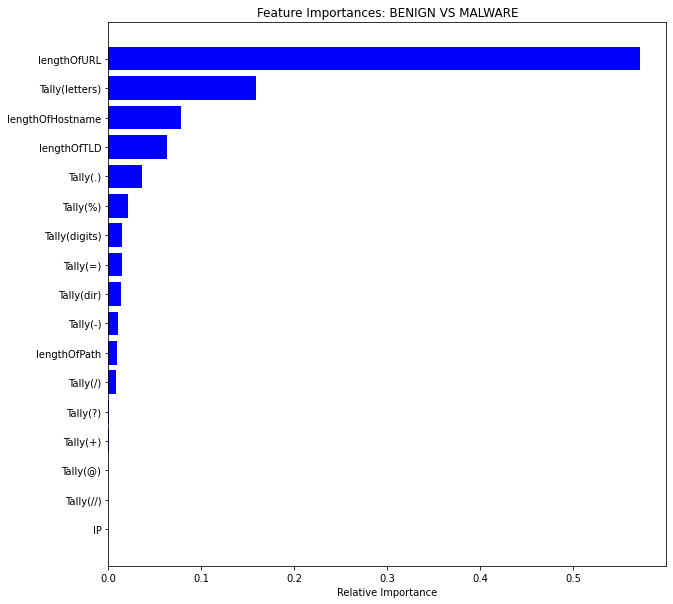

In [98]:
features = x.columns
importances = test_model.feature_importances_
indices = np.argsort(importances)
for i in range(len(indices)):
    print(features[i]," has importance of ",importances[i])
plt.figure(figsize=(10,10))
plt.title('Feature Importances: BENIGN VS MALWARE')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

lengthOfURL  has importance of  0.001345042171757196
lengthOfHostname  has importance of  0.041993037219142264
lengthOfPath  has importance of  0.01139176059392992
lengthOfTLD  has importance of  0.8676441113199226
Tally(.)  has importance of  5.4961966319307074e-05
Tally(-)  has importance of  0.06566829407572256
Tally(@)  has importance of  0.0
Tally(%)  has importance of  2.82661541070722e-05
Tally(=)  has importance of  0.010253091404001553
Tally(/)  has importance of  0.00013111268082048667
Tally(?)  has importance of  0.0
Tally(+)  has importance of  1.8902103153328574e-06
Tally(//)  has importance of  9.422051369024067e-05
Tally(dir)  has importance of  5.693380369647877e-05
Tally(digits)  has importance of  0.000829066060805583
Tally(letters)  has importance of  0.0005082118257694971
IP  has importance of  0.0


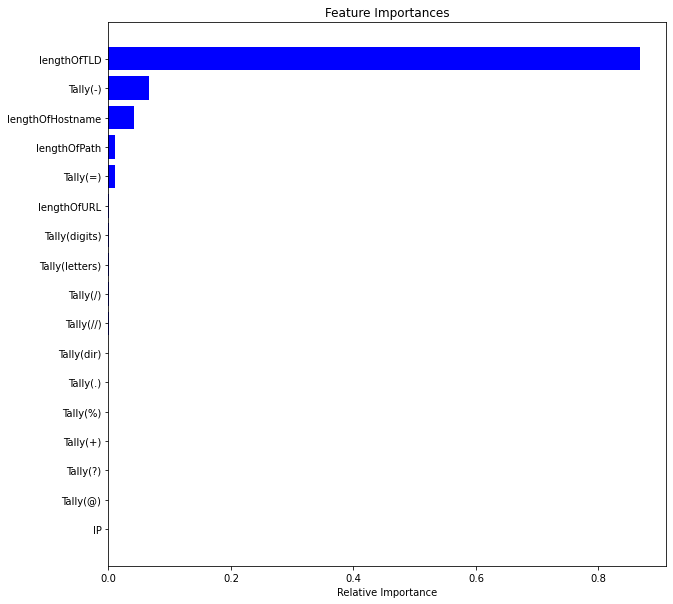

In [136]:
features = x.columns
importances = test_model1.feature_importances_
indices = np.argsort(importances)
for i in range(len(indices)):
    print(features[i]," has importance of ",importances[i])
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()